In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [2]:
#%% For graphs
import matplotlib.style as style
plt.rcParams.update({'axes.labelsize':16})
plt.rcParams.update({'axes.titlesize':16})
plt.rcParams.update({'legend.fontsize':16})
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 4
style.use('ggplot')

In [3]:
'''Get data and put in adequate form'''
data = pd.read_csv('wdbc.csv', header=None).iloc[:, 1:12]
X = data.iloc[: , 1:]
X = np.array(X)
y = data.iloc[: , 0]
y = np.where(y == 'M', 1, 0)
y = np.array(y)

In [4]:
from GLM import GLM

In [5]:
'''Fit model and compare'''  
model1 = GLM(X,y)
model1.gradient_ascent()
beta_gradient_ascent = model1.beta

Converged in 5714 iterations


In [6]:
#%%compare with built-in Python function
logit = sm.Logit(y, model1.X).fit()
beta_function = logit.params #parameters
ll_function = logit.llf#likelihood

Optimization terminated successfully.
         Current function value: 0.128410
         Iterations 10


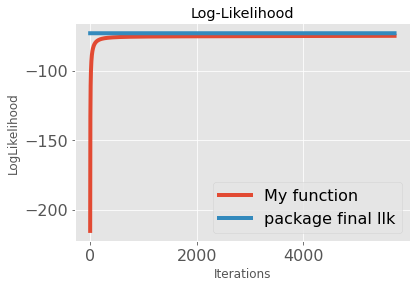

In [7]:
fig, ax = plt.subplots()
plt.plot([i+1 for i in range(len(model1.likelihoods))], 
         model1.likelihoods, label = 'My function')
plt.plot([i+1 for i in range(len(model1.likelihoods))], 
         ll_function*np.ones(len(model1.likelihoods)), 
         label = 'package final llk')
plt.title("Log-Likelihood")
plt.xlabel("Iterations")
plt.ylabel("LogLikelihood")
plt.legend()
plt.show()

In [9]:
beta_gradient_ascent

array([-0.46999846,  0.70331234,  1.63620996,  0.49140481,  2.67683035,
        1.09703371, -0.78882637,  1.10500418,  2.22756583,  0.48680885,
       -0.20918425])

In [10]:
beta_function

array([ 0.48701675, -7.21550165,  1.65330142, -1.73610268, 13.99253365,
        1.07400828, -0.07716665,  0.67452961,  2.59059481,  0.445864  ,
       -0.48206004])